This is my first exploration of the Hsiao dataset.

In [24]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from skbio.diversity import beta_diversity
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

# Read in + investigate data

Now, what do we have here..?

In [25]:
fotu = '../../data/raw/hsiao/qiime/hsiao_export/hsiao.feature_table.txt'
fmeta = '../../data/raw/hsiao/TableS3_human16S_tidy.xlsx'

df = pd.read_csv(fotu, sep='\t', skiprows=1, index_col=0)
meta = pd.read_excel(fmeta)

In [26]:
df.shape, meta.shape

((2851, 474), (1704, 17))

In [27]:
df.head()

,A.diarrhea.062,Bgsng7052.m26,Bgsng7071.m32,Bgsng7150.m36,Bgsng7192.m28,G.recovery.d003,Bgsng7204.m29,G.diarrhea.026,G.recovery.d037,A.diarrhea.098,...,A.recovery.d014,C.recovery.d009,Bgsng7090.m31,Bgsng7150.m31,Bgsng7128.m27,Bgsng7192.m25,C.recovery.d052,F.diarrhea.020,A.recovery.d004,Bgsng7052.m25
#OTU ID,,,,,,,,,,,,,,,,,,,,,
bbe1b6abd7b8765bdb44601cea259ef0,10645.0,15.0,0.0,400.0,144.0,0.0,730.0,0.0,0.0,44.0,...,1.0,0.0,72.0,768.0,6.0,68.0,54.0,0.0,0.0,82.0
c90c3a8c4950b89e6e285afa2c05b3e3,2709.0,74.0,3.0,981.0,1259.0,6677.0,0.0,13729.0,9.0,2252.0,...,47.0,1462.0,121.0,0.0,2.0,4336.0,1069.0,12659.0,1246.0,6.0
ddc7466d073c844eeb86db871e43f205,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6bf1a63f1d1b1de9479fb487edb3c077,626.0,4.0,447.0,105.0,234.0,207.0,20.0,3.0,4387.0,5936.0,...,15.0,120.0,267.0,7.0,0.0,3.0,36.0,2186.0,2944.0,540.0
7e7a16ce216f4ed1d626e25a0f144911,178.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,425.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
meta.head()

,Subject ID,Fecal SampleID*,Fecal SampleID bold?,Barcode Sequence,Number of V4-16S rRNA sequences,"Age of subject at time of fecal sample collection, years","Age, days","Age, months",16S rRNA Sequencing Run ID,Group description,SampleID description,Diet at time of fecal sample collection - Breast Milk,Diet at time of fecal sample collection - Formula,Diet at time of fecal sample collection - Solid Foods,Diarrhoea within 7 days prior to sample collection,Antibiotics within 7 days prior to sample collection,Medications (Antibiotics and other)
0,A,A.diarrhea.016,NaN,CGTACCAGATCC,125054,NaN,NaN,NaN,NaN,a. Human fecal cholera study V4-16S rRNA seque...,* SubjectID.Study Phase.Sample Number,NaN,NaN,NaN,NaN,NaN,NaN
1,A,A.diarrhea.020,NaN,GTTCTGCTTGTT,72820,NaN,NaN,NaN,NaN,a. Human fecal cholera study V4-16S rRNA seque...,* SubjectID.Study Phase.Sample Number,NaN,NaN,NaN,NaN,NaN,NaN
2,A,A.diarrhea.021,NaN,GGCGAACTGAAG,126678,NaN,NaN,NaN,NaN,a. Human fecal cholera study V4-16S rRNA seque...,* SubjectID.Study Phase.Sample Number,NaN,NaN,NaN,NaN,NaN,NaN
3,A,A.diarrhea.024,NaN,CTATCGGAAGAT,122440,NaN,NaN,NaN,NaN,a. Human fecal cholera study V4-16S rRNA seque...,* SubjectID.Study Phase.Sample Number,NaN,NaN,NaN,NaN,NaN,NaN
4,A,A.diarrhea.027,NaN,TTGGAACGGCTT,105048,NaN,NaN,NaN,NaN,a. Human fecal cholera study V4-16S rRNA seque...,* SubjectID.Study Phase.Sample Number,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
[i for i in df.columns if i not in meta['Fecal SampleID*'].values]

[]

Great, all of the samples that we have data for also have metadata (I think this is obvious from which files I pulled down from the ENA - but still, that also means that no samples failed processing woop!)

In [30]:
samples = df.columns.tolist()
meta['sample_id'] = meta['Fecal SampleID*']
meta = meta.query('sample_id == @samples')

In [31]:
meta.groupby('Group description').size()

Group description
a. Human fecal cholera study V4-16S rRNA sequencing    236
g. Healthy children controls V4-16S rRNA sequencing    238
dtype: int64

### Add some wrangled metadata categories

In [32]:
# Add disease label. 
# Group A children are coded in the sample ID
a_group = meta['Group description'].str.startswith('a')
meta.loc[a_group, 'disease'] = meta.loc[a_group, 'sample_id'].str.split('.').str[1]

# Group G children are all healthy
g_group = meta['Group description'].str.startswith('g')
meta.loc[g_group, 'disease'] = 'healthy'

In [33]:
# Add day
# Group G is coded in sample ID, but is in months
meta.loc[g_group, 'day'] = meta.loc[g_group, 'sample_id'].str.split('.').str[-1].str[1:].astype(float)*30

In [34]:
# Group A day is coded in sample ID
# The diarrheal period goes from zero to N days, with the last sample being coded "end"
# Then the recovery samples are dNNN

for subj, subdf in meta.loc[a_group].groupby('Subject ID'):
    tmp = subdf['Fecal SampleID*'].tolist()
    tmp_days = []
    day = 0
    last_diarrhea = 0
    for i in tmp:
        if i.split('.')[1] == "diarrhea":
            if i.split('.')[-1] != "end":
                day = float(i.split('.')[-1])
            else:
                day += 1
        elif i.split('.')[1] == "recovery":
            # Grab final day
            if last_diarrhea == 0:
                last_diarrhea = day
            day = last_diarrhea + float(i.split('.')[-1][1:])
        tmp_days.append(day)
    meta.loc[subdf.index, 'day'] = tmp_days

Okay, but actually re-code all recovery samples to be the "same" time point (equal to the first one... I guess?)

In [35]:
meta.query('disease == "recovery"').groupby('Subject ID').min()['day']

Subject ID
A    107.0
B     61.0
C    118.0
D     23.0
E     71.0
F     39.0
G     31.0
Name: day, dtype: float64

In [36]:
for subj, subdf in meta.loc[a_group].groupby('Subject ID'):
    first_recovery = subdf.query('disease == "recovery"').min()['day']
    meta.loc[subdf.query('disease == "recovery"').index, 'day'] = first_recovery

In [37]:
meta.query('disease == "recovery"').groupby('Subject ID').min()['day']

Subject ID
A    107.0
B     61.0
C    118.0
D     23.0
E     71.0
F     39.0
G     31.0
Name: day, dtype: float64

In [38]:
meta.query('disease == "recovery"').groupby('Subject ID').max()['day']

Subject ID
A    107.0
B     61.0
C    118.0
D     23.0
E     71.0
F     39.0
G     31.0
Name: day, dtype: float64

In [39]:
meta[['sample_id', 'disease', 'day']].head()

,sample_id,disease,day
0,A.diarrhea.016,diarrhea,16.0
1,A.diarrhea.020,diarrhea,20.0
2,A.diarrhea.021,diarrhea,21.0
3,A.diarrhea.024,diarrhea,24.0
4,A.diarrhea.027,diarrhea,27.0


In [40]:
meta[['sample_id', 'disease', 'day']].tail()

,sample_id,disease,day
703,Bgsng8169.m32,healthy,960.0
704,Bgsng8169.m33,healthy,990.0
705,Bgsng8169.m34,healthy,1020.0
706,Bgsng8169.m35,healthy,1050.0
707,Bgsng8169.m36,healthy,1080.0


# Data investigation

Ok fine, before PCA let's check out the OTU table we made...

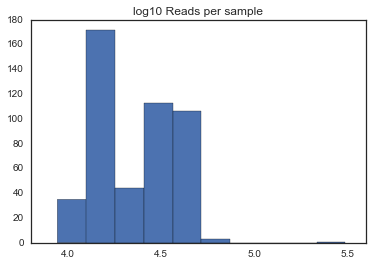

In [41]:
# Reads per sample
plt.hist(np.log10(df.sum() + 1))
plt.title('log10 Reads per sample')

Looks like min sample has 10,000 reads (this is same as in the David dataset... an artifact of DADA2, or just two deeply sequenced datasets...?)

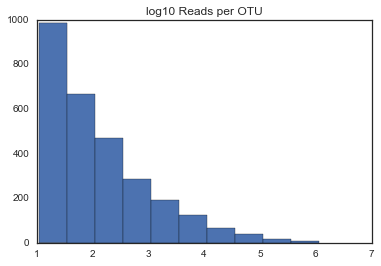

In [42]:
plt.hist(np.log10(df.sum(axis=1) + 1))
plt.title('log10 Reads per OTU')

# PCA!

In [43]:
# Rows should contain samples, columns should have OTUs
df = df.T
df.head()

#OTU ID,bbe1b6abd7b8765bdb44601cea259ef0,c90c3a8c4950b89e6e285afa2c05b3e3,ddc7466d073c844eeb86db871e43f205,6bf1a63f1d1b1de9479fb487edb3c077,7e7a16ce216f4ed1d626e25a0f144911,bda9644fa1bec6c0e75cee105e869d42,dac5ca8f20f8291f145c1fd866681218,e6c455846421d3fddd93b1960f78ab08,de4489de0ed2c7a9a8f449164b335fea,e61ce464762adef827e605922b2946e5,...,eeacf6793e9c483cae7f48d295f0cf66,7a38d0bda720a66891722966f63cf6b7,cc9805d9b9ed24f88d0443a69f6029e6,af982c4332b8714c1e48a63ad9588ac7,0a7df920b573f927d17cbd067b9c6fd5,759fe850f2ce516d28a81d9022e64558,fdd1731a9695493c09fd0dac29c57940,19e05c133a36c8fad1b8aae68b8db0e2,29b43dab144ef0ad9c96b826c1af057a,93c8179db48df83d4d5f50e786a4fc3d
A.diarrhea.062,10645.0,2709.0,1002.0,626.0,178.0,161.0,69.0,67.0,35.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bgsng7052.m26,15.0,74.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bgsng7071.m32,0.0,3.0,0.0,447.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bgsng7150.m36,400.0,981.0,0.0,105.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bgsng7192.m28,144.0,1259.0,0.0,234.0,10.0,1.0,2.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Calculate beta diversity
metric = 'braycurtis'
counts = df.astype(int).values
sample_ids = df.index.tolist()

results = beta_diversity(
    metric=metric,
    counts=counts,
    ids=sample_ids)

In [45]:
results.to_data_frame().head()

,A.diarrhea.062,Bgsng7052.m26,Bgsng7071.m32,Bgsng7150.m36,Bgsng7192.m28,G.recovery.d003,Bgsng7204.m29,G.diarrhea.026,G.recovery.d037,A.diarrhea.098,...,A.recovery.d014,C.recovery.d009,Bgsng7090.m31,Bgsng7150.m31,Bgsng7128.m27,Bgsng7192.m25,C.recovery.d052,F.diarrhea.020,A.recovery.d004,Bgsng7052.m25
A.diarrhea.062,0.000000,0.996578,0.982653,0.942008,0.926796,0.832563,0.972883,0.829880,0.962042,0.796583,...,0.994822,0.895437,0.981014,0.973414,0.999654,0.894065,0.915262,0.785161,0.887986,0.977227
Bgsng7052.m26,0.996578,0.000000,0.948847,0.764805,0.706233,0.880897,0.716857,0.996198,0.926103,0.994091,...,0.991903,0.901612,0.585485,0.834728,0.663854,0.718459,0.809730,0.997050,0.938902,0.920169
Bgsng7071.m32,0.982653,0.948847,0.000000,0.849999,0.871269,0.942544,0.894267,0.976646,0.835920,0.980071,...,0.978230,0.957334,0.848129,0.740590,0.940232,0.960938,0.952818,0.982523,0.966983,0.949307
Bgsng7150.m36,0.942008,0.764805,0.849999,0.000000,0.701295,0.824525,0.704041,0.953784,0.825666,0.953093,...,0.898827,0.828981,0.592324,0.723973,0.882794,0.760930,0.850623,0.956621,0.912503,0.938858
Bgsng7192.m28,0.926796,0.706233,0.871269,0.701295,0.000000,0.878226,0.610443,0.943048,0.877047,0.921646,...,0.985956,0.846037,0.723075,0.828576,0.776288,0.604974,0.784244,0.930551,0.865931,0.756950


In [46]:
# Do PCA
dada_pca = PCA(random_state=12345).fit(results.to_data_frame().values)
ypca_dada = dada_pca.transform(results.to_data_frame().values)

In [47]:
dada_pca.explained_variance_ratio_.sum()

1.0

In [48]:
# Make dataframe for plotting
dfpca = pd.DataFrame(data=ypca_dada, index=sample_ids, columns=['PC' + str(i) for i in range(ypca_dada.shape[1])])

dada_pca_toplot = pd.DataFrame(columns=['sample', 'PC0', 'PC1'])
dada_pca_toplot['sample'] = dfpca.index
dada_pca_toplot['PC0'] = dfpca['PC0'].values
dada_pca_toplot['PC1'] = dfpca['PC1'].values
dada_pca_toplot.head()

,sample,PC0,PC1
0,A.diarrhea.062,1.849497,1.012835
1,Bgsng7052.m26,-2.466575,-0.980531
2,Bgsng7071.m32,-0.670900,1.228093
3,Bgsng7150.m36,-1.482100,-0.202321
4,Bgsng7192.m28,-2.141084,-1.649366


In [49]:
dada_pca_toplot = pd.merge(dada_pca_toplot, meta, left_on='sample', right_on='sample_id')
dada_pca_toplot.columns

Index([                                                  u'sample',
                                                            u'PC0',
                                                            u'PC1',
                                                     u'Subject ID',
                                                u'Fecal SampleID*',
                                           u'Fecal SampleID bold?',
                                               u'Barcode Sequence',
                                u'Number of V4-16S rRNA sequences',
       u'Age of subject at time of fecal sample collection, years',
                                                      u'Age, days',
                                                    u'Age, months',
                                     u'16S rRNA Sequencing Run ID',
                                              u'Group description',
                                           u'SampleID description',
          u'Diet at time of fecal sample collect

In [50]:
cdict = {'diarrhea': 'red', 'recovery': 'purple', 'healthy': 'blue'}
dada_pca_toplot['disease_color'] = dada_pca_toplot['disease'].apply(lambda x: cdict[x])

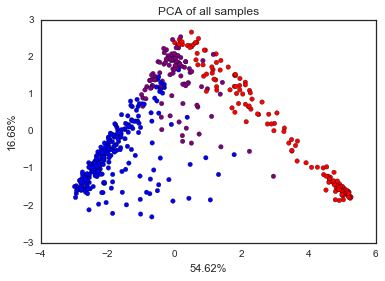

In [51]:
plt.scatter(dada_pca_toplot['PC0'], dada_pca_toplot['PC1'], c=dada_pca_toplot['disease_color'])
plt.title("PCA of all samples")
plt.xlabel('{:.2f}%'.format(dada_pca.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(dada_pca.explained_variance_ratio_[1]*100))

Hm, that looks suspiciously batchy... Gr. I need to go dig into the original paper and see if they made any PCA plots or something similar. Or at least see if they directly combined/compared these two cohorts?

## PCA on just the diarrhea/recovery patients

Looks like there is at least some separation in the diarrhea/recovery kids. Let's just look at these samples.

In [52]:
a_samples = meta.loc[a_group, 'sample_id'].values

dada_pca_agroup = PCA(random_state=12345).fit(results.to_data_frame().loc[a_samples, a_samples].values)
ypca_dada_agroup = dada_pca_agroup.transform(results.to_data_frame().loc[a_samples, a_samples].values)

In [53]:
# Make dataframe for plotting
dfpca_agroup = pd.DataFrame(data=ypca_dada_agroup, 
                            index=a_samples, 
                            columns=['PC' + str(i) for i in range(ypca_dada_agroup.shape[1])])

dada_pca_toplot_agroup = pd.DataFrame(columns=['sample', 'PC0', 'PC1'])
dada_pca_toplot_agroup['sample'] = dfpca_agroup.index
dada_pca_toplot_agroup['PC0'] = dfpca_agroup['PC0'].values
dada_pca_toplot_agroup['PC1'] = dfpca_agroup['PC1'].values
dada_pca_toplot_agroup = pd.merge(dada_pca_toplot_agroup, meta, left_on='sample', right_on='sample_id', how='left')
dada_pca_toplot_agroup['disease_color'] = dada_pca_toplot_agroup['disease'].apply(lambda x: cdict[x])
dada_pca_toplot_agroup.head()

,sample,PC0,PC1,Subject ID,Fecal SampleID*,Fecal SampleID bold?,Barcode Sequence,Number of V4-16S rRNA sequences,"Age of subject at time of fecal sample collection, years","Age, days",...,Diet at time of fecal sample collection - Breast Milk,Diet at time of fecal sample collection - Formula,Diet at time of fecal sample collection - Solid Foods,Diarrhoea within 7 days prior to sample collection,Antibiotics within 7 days prior to sample collection,Medications (Antibiotics and other),sample_id,disease,day,disease_color
0,A.diarrhea.016,-2.017714,0.152791,A,A.diarrhea.016,NaN,CGTACCAGATCC,125054,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A.diarrhea.016,diarrhea,16.0,red
1,A.diarrhea.020,-1.159835,0.505538,A,A.diarrhea.020,NaN,GTTCTGCTTGTT,72820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A.diarrhea.020,diarrhea,20.0,red
2,A.diarrhea.021,-1.431443,0.237672,A,A.diarrhea.021,NaN,GGCGAACTGAAG,126678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A.diarrhea.021,diarrhea,21.0,red
3,A.diarrhea.024,3.047537,-0.332423,A,A.diarrhea.024,NaN,CTATCGGAAGAT,122440,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A.diarrhea.024,diarrhea,24.0,red
4,A.diarrhea.027,3.896305,-0.544270,A,A.diarrhea.027,NaN,TTGGAACGGCTT,105048,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A.diarrhea.027,diarrhea,27.0,red


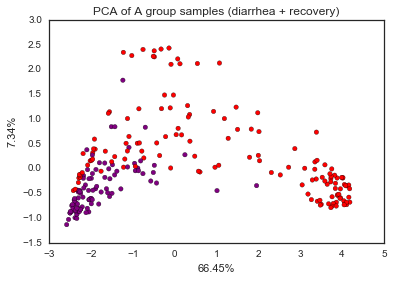

In [54]:
plt.scatter(dada_pca_toplot_agroup['PC0'], dada_pca_toplot_agroup['PC1'], c=dada_pca_toplot_agroup['disease_color'])
plt.title("PCA of A group samples (diarrhea + recovery)")
plt.xlabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[1]*100))

Whoa, what's going on here?? Weird. I wonder what that cluser over the right is - perhaps the early-infection kids? Need to clean up the day column and group it to see...

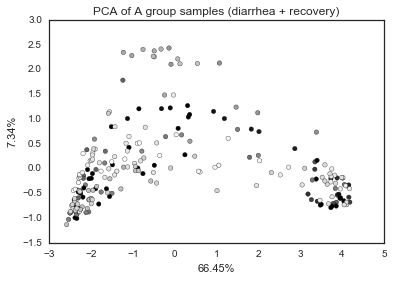

In [55]:
dada_pca_toplot_agroup['day_truncated'] = dada_pca_toplot_agroup['day'].apply(lambda x: 100 if x >= 100 else x)

plt.scatter(dada_pca_toplot_agroup['PC0'], dada_pca_toplot_agroup['PC1'], c=dada_pca_toplot_agroup['day_truncated'])
plt.title("PCA of A group samples (diarrhea + recovery)")
plt.xlabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[1]*100))

Maybe it's a subject-wise difference?

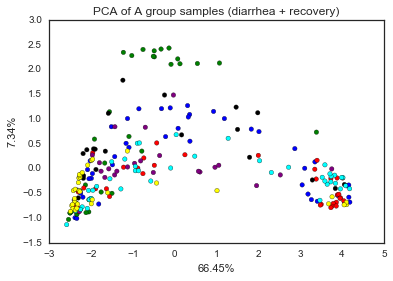

In [56]:
sdict = {'A': 'b', 'B': 'g', 'C': 'r', 'D': 'purple', 'E': 'black', 'F': 'cyan', 'G': 'yellow'}

dada_pca_toplot_agroup['subject_color'] = dada_pca_toplot_agroup['Subject ID'].apply(lambda x: sdict[x])

plt.scatter(dada_pca_toplot_agroup['PC0'], dada_pca_toplot_agroup['PC1'], c=dada_pca_toplot_agroup['subject_color'])
plt.title("PCA of A group samples (diarrhea + recovery)")
plt.xlabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(dada_pca_agroup.explained_variance_ratio_[1]*100))

Next steps: which taxa correlate with PC1? What is this business?? 

But actually first next steps: be less lazy about my coloring scheme. Actually categorize patients by diarrheal "stage" (rather than day) so I can have distinct categories that are comparable across the different patients...